# Benchmark

Done by Marwa RAJFALLAH, Aniss BENTEBIB, Camille-Amaury JUGE.



##  I - Like per one second :

### data explanation

Each column corresponds to the time to execute the n steps of the javascript loop, and get the response of the server.
Each row corresponds to one of the 30 try we did to harmonize the dataset mean and median.

Time is in milliseconds.

As we can see below, the javascript loop just go over all users that he can during 1 seconds and stops. That's why there are some response time which are greater than 1000ms=1s.

We won't take them to account in the computation of mean and median.

In [48]:
# import datas 
data <- read.csv("likeperformance.csv", header = FALSE)
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
260.510,339.455,360.040,439.495,540.280,637.890,740.135,763.115,840.795,944.730,...,1138.930,1141.335,1142.320,1143.165,1144.120,1157.400,1235.545,1244.500,1280.525,6695.530
236.595,237.655,238.530,332.590,535.250,536.805,537.635,636.220,660.050,733.620,...,1035.330,1035.710,1037.545,1038.255,1038.855,1039.515,1062.615,1134.400,1167.060,6673.925
574.225,577.245,578.685,579.805,580.645,775.970,987.675,1075.765,1184.595,1185.690,...,1285.560,1373.755,1375.995,1476.470,1572.335,1677.215,1678.085,1679.615,1680.505,6860.830
258.480,261.005,358.420,359.925,360.640,456.845,457.815,660.875,662.090,761.035,...,961.185,1057.240,1150.375,1154.400,1155.835,1156.790,1254.590,1255.405,1256.420,6459.925
318.070,413.590,417.175,512.220,514.555,515.170,515.990,516.760,616.135,702.365,...,812.615,827.040,831.650,901.395,911.865,915.145,917.255,918.945,919.590,920.140
260.855,358.720,359.350,360.075,460.570,461.500,466.025,467.890,469.065,555.115,...,963.065,965.075,968.250,1056.480,1057.015,1057.800,1063.155,1063.645,1064.720,1155.105


### Re-arranging datas

For each column, we only keep the <= 1000 values.

Then we compute the number of like done in less or equal to 1 second.

Then we do the average mean and median on the total executions.

In [35]:
new_data <- list()
new_data_info <- c()
for (i in 1:dim(data)[1]){
    row <- data[i,]
    new_data[[toString(i)]] <- row[row <= 1000]
    new_data_info <- c(new_data_info, length(new_data[[toString(i)]]))
}
mean_med <- c(mean(new_data_info), median(new_data_info))

[1] "mean : 9.83333333333333 ms"
[1] "median : 10 ms"


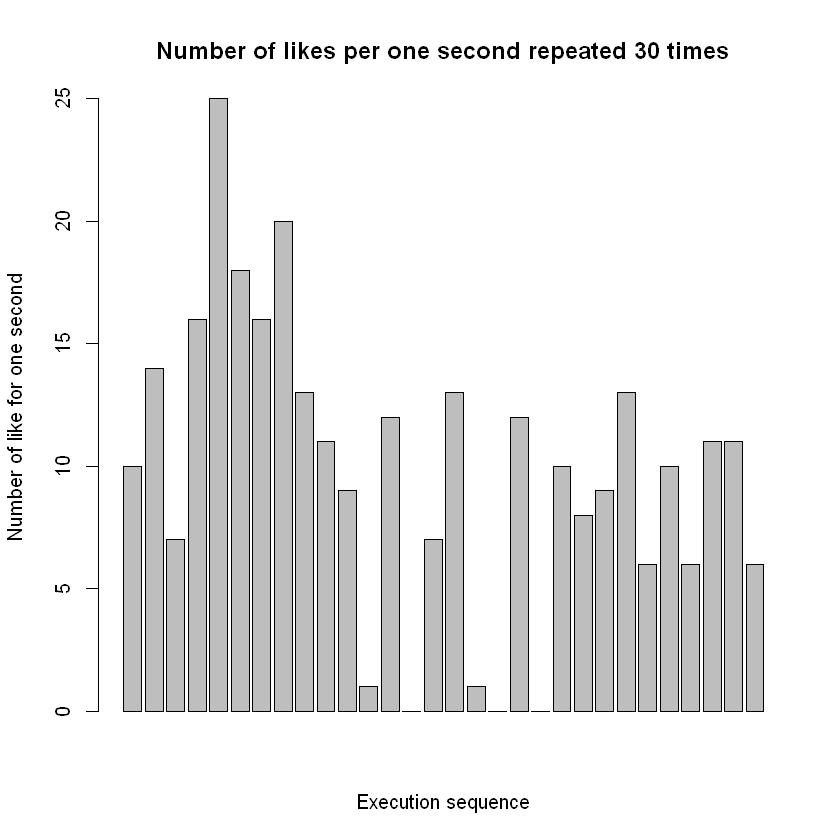

In [36]:
barplot(
    new_data_info,
    main = "Number of likes per one second repeated 30 times",
    xlab = "Execution sequence",
    ylab = "Number of like for one second"
)

print(paste0("mean : ", mean_med[1], " ms"))
print(paste0("median : ", mean_med[2], " ms"))

As we can see, median is more accurate since there are sometimes really long server response (probably due to the "free" endpoint and network bad connection)

### Server time response

In order to evaluate the raised issue, we propose to see the current mean, median of the serve time response

First we are going to only keep the first column of row in the initial matrix and then compute.

In [37]:
new_data_info <- as.vector(data[,1])
mean_med <- c(mean(new_data_info), median(new_data_info))

[1] "mean : 503.006000000035 ms"
[1] "median : 422.36999999977 ms"


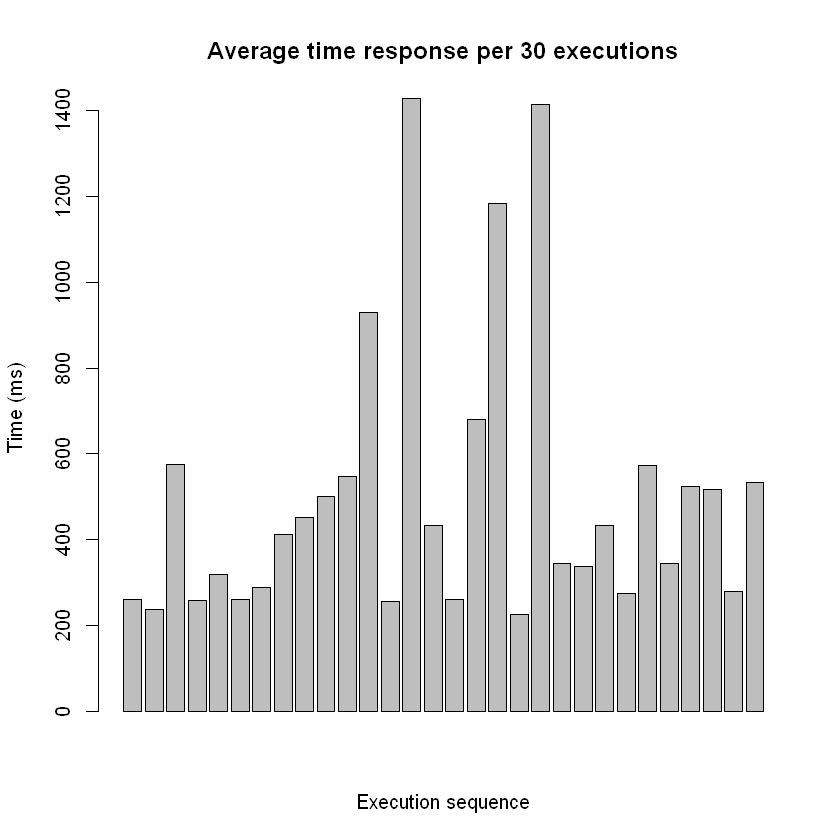

In [38]:
barplot(
    new_data_info,
    main = "Average time response per 30 executions",
    xlab = "Execution sequence",
    ylab = "Time (ms)"
)

print(paste0("mean : ", mean_med[1], " ms"))
print(paste0("median : ", mean_med[2], " ms"))

As always, median is more accurate and confirms what we already expected.

There are some outliers (sometimes long response) which tensed to pull the mean. It means that sometimes, the first response will affect a lot the number of like we can compute in one second.

As you can see, the two bar plots evolve in the opposite direction (meaning that they are some correlation).

### Average server elapsed time between two likes

One really interesting thing could be to compare the elapsed time in a sequence between the i and i+1 like.

It could bring us a global time between two insertion.

Moreover, we will try to evaluate the corresponding time while passing more and more request to the server.

In [59]:
timeCompare <- function(M){
    M_ini <- as.matrix(M)
    m <- matrix(0,  dim(M_ini)[1], dim(M_ini)[2]-2)
    for(i in 1:dim(M_ini)[1]){
        for(j in 1:(dim(M_ini)[2]-2)){
            m[i, j] <- M_ini[i,j+1] - M_ini[i,j]
        }
    }
    return(m)
}
new_data_info <- colMeans(timeCompare(data))

[1] "mean : 54.7968405797108 ms"


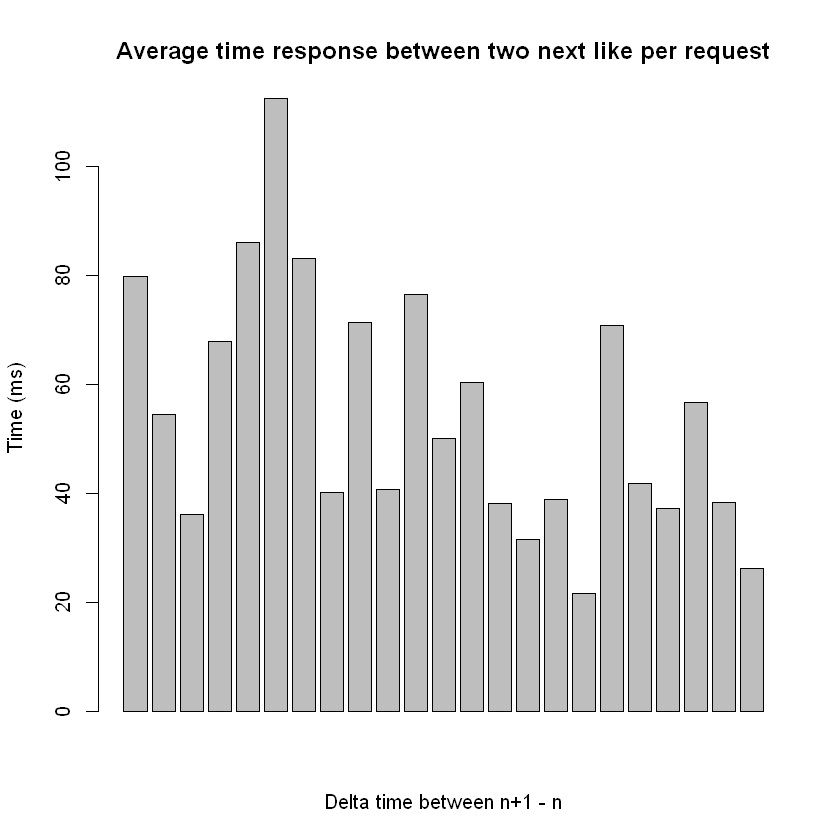

In [58]:
barplot(
    new_data_info,
    main = "Average time response between two next like per request",
    xlab = "Delta time between n+1 - n",
    ylab = "Time (ms)"
)

print(paste0("mean : ", mean(new_data_info), " ms"))

As we can conclude, there is no real link between the number of request here, and the time execution between two likes.

It seems that the time between two likes is dependant of an other factor.

##  II - Retrieve Posts :

### data explanation

Each column corresponds to the 10,100,500.
Each row corresponds to one of the 30 try we did to harmonize the dataset mean and median.

Time is in milliseconds.

In [2]:
# import datas 
data <- read.csv("retrievepostperformance.csv", header = TRUE)
head(data)

X10,X100,X500
593.630,2049.620,14014.675
549.625,2110.365,8343.085
568.730,2193.460,8417.025
540.405,2045.410,8283.830
483.060,1908.295,8796.335
312.720,2096.055,8637.130


In [10]:
med_col <- c()
mean_col <- c()
for (i in 1:dim(data)[2]){
    column <- as.vector(data[,i])
    mean_col = c(mean_col, mean(column))
    med_col = c(med_col, median(column))
}
new_data <- rbind(mean_col,med_col)

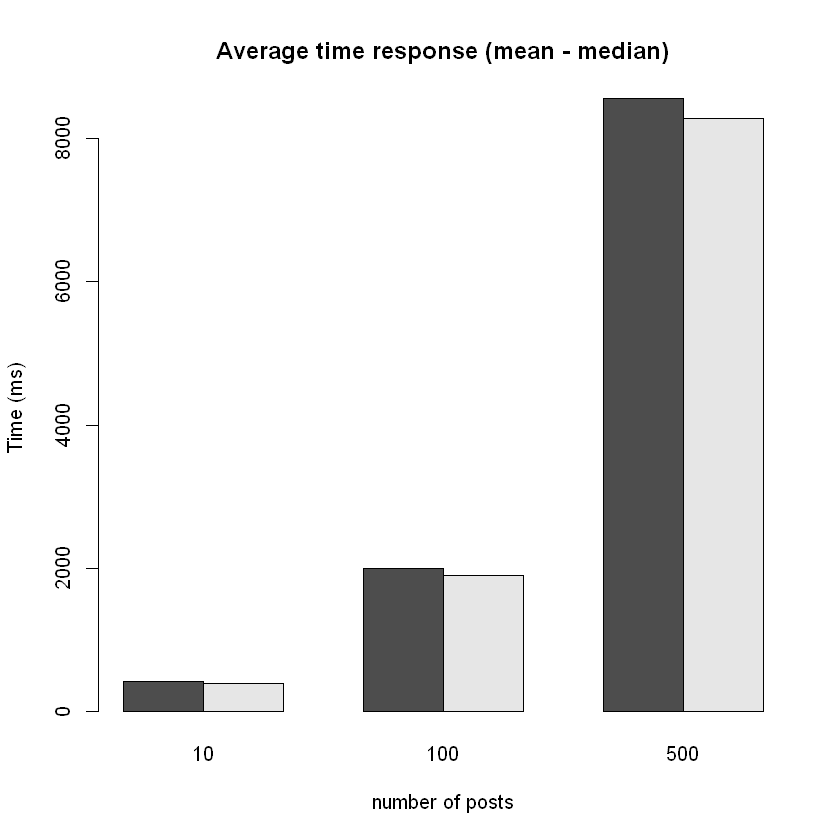

In [14]:
barplot(
    new_data,
    main = "Average time response (mean - median)",
    xlab = "number of posts",
    ylab = "Time (ms)",
    names.arg = c("10", "100", "500"),
    beside=T
)

As we can see the more posts we ask, the more time it will take, the relation seems to grow linear (be carefull of the number).
In a real-time environnement like Instagram, we should consider to get an 10-20 posts and ask for the older ones if the user scrolls.

It would enable the server to handle quick response and users not to overwait/load their content.